<a href="https://colab.research.google.com/github/Prianka-Mukhopadhyay/bart_distilbart_pegasus_t5_text_summarization/blob/main/bart_distilbart_pegasus_t5_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing everything necessary
!pip install transformers torch gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Importing BART

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Load the model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
# def summarize_text(text):
#     # Encode the text into tokens
#     inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)

#     # Generate summary IDs
#     summary_ids = model.generate(
#         inputs['input_ids'],
#         max_length=150,
#         min_length=40,
#         length_penalty=2.0,
#         num_beams=4,
#         early_stopping=True
#     )

#     # Decode the generated IDs back into text
#     summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
#     return summary


In [ ]:
def summarize_text(text):
    # Encode the text into tokens
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)

    # Generate summary IDs
    summary_ids = model.generate(
      inputs['input_ids'],
      max_length=100,   # shorter summaries
      min_length=20,
      length_penalty=1.0,
      num_beams=6,      # higher beam search for better results
      early_stopping=True
    )

    # Decode the generated IDs back into text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [ ]:
sample_text = """
My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions
"""
print(summarize_text(sample_text))

"Harry Potter and the Prisoner of Azkaban" is a pivotal book in the series. The introduction of Sirius Black and Remus Lupin adds depth to the wizarding world. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end.


Gradio

In [ ]:
!pip install gradio --quiet
import gradio as gr


In [ ]:
# Define Gradio interface
interface = gr.Interface(
    fn=summarize_text,           # Function to call
    inputs=gr.Textbox(lines=10, placeholder="Paste text here..."),  # Input box
    outputs="text",              # Output is plain text
    title="BART Text Summarizer",
    description="Enter text and get a summary using Hugging Face BART model."
)

# Launch the app
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2ddaa5dba24b0f0b77.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Load DistilBART and Tokenizer**

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# DistilBART is a smaller, faster version of BART.
# Model: sshleifer/distilbart-cnn-12-6
# Tokenizer converts text into numerical tokens the model can understand.

distilbart_model_name = "sshleifer/distilbart-cnn-12-6"
distilbart_tokenizer = BartTokenizer.from_pretrained(distilbart_model_name)
distilbart_model = BartForConditionalGeneration.from_pretrained(distilbart_model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

**Generate Summary with DistilBART**

In [ ]:
def summarize_distilbart(text):
    # Encode the input text into tokens
    inputs = distilbart_tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)

    # Generate summary IDs with beam search
    summary_ids = distilbart_model.generate(
        inputs['input_ids'],
        max_length=150,        # max length of summary
        min_length=40,         # minimum length
        length_penalty=2.0,    # encourages more concise summary
        num_beams=4,           # beam search size for better quality
        early_stopping=True    # stop generation once complete
    )

    # Decode generated tokens back into text
    summary = distilbart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [ ]:
# =========================
# Step 3: Test DistilBART Summary
# =========================

sample_text = """
My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions
"""

# Generate summary
distilbart_summary = summarize_distilbart(sample_text)

# Print output
print("=== DistilBART Summary ===")
print(distilbart_summary)


=== DistilBART Summary ===
 "Harry Potter and the Prisoner of Azkaban" is a pivotal book in the series . The introduction of Sirius Black and Remus Lupin adds depth to the wizarding world and Harry's personal journey . The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end .


In [ ]:
# =========================
# Step 1: Load Pegasus Model and Tokenizer
# =========================

from transformers import PegasusTokenizer, PegasusForConditionalGeneration

# Model trained for summarization tasks
pegasus_model_name = "google/pegasus-cnn_dailymail"
pegasus_tokenizer = PegasusTokenizer.from_pretrained(pegasus_model_name)
pegasus_model = PegasusForConditionalGeneration.from_pretrained(pegasus_model_name)


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
# =========================
# Step 2: Summarize Text with Pegasus
# =========================

def summarize_pegasus(text):
    # Encode the input text into tokens
    inputs = pegasus_tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)

    # Generate summary IDs
    summary_ids = pegasus_model.generate(
        inputs['input_ids'],
        max_length=150,        # max length of summary
        min_length=40,         # min length of summary
        length_penalty=2.0,    # controls length
        num_beams=4,           # beam search for better quality
        early_stopping=True
    )

    # Decode generated IDs back into text
    summary = pegasus_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [ ]:
# =========================
# Step 3: Test Pegasus Summary
# =========================

sample_text = """
My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions
"""

pegasus_summary = summarize_pegasus(sample_text)

print("=== Pegasus Summary ===")
print(pegasus_summary)


=== Pegasus Summary ===
The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world .<n>The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end .


In [ ]:
# =========================
# Step 1: Load T5 Model and Tokenizer
# =========================
# T5 = "Text-to-Text Transfer Transformer"
# For summarization, T5 expects the input to start with the prefix: "summarize: "

from transformers import T5Tokenizer, T5ForConditionalGeneration

t5_model_name = "t5-base"   # alternatives: "t5-small" (faster), "t5-large" (better but heavier)
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# =========================
# Step 2: Summarize Text with T5
# =========================
# Key differences vs BART/Pegasus:
# - We prepend "summarize: " to the input text (task instruction).
# - T5-base typically accepts up to 512 tokens as input (vs ~1024 for BART/Pegasus).

def summarize_t5(text):
    # Add the task prefix so T5 knows we're summarizing
    prefixed_text = "summarize: " + text.strip()

    # Tokenize/encode; truncate to fit T5's input limits
    inputs = t5_tokenizer(
        [prefixed_text],
        max_length=512,         # T5-base input limit is usually 512 tokens
        return_tensors='pt',
        truncation=True
    )

    # Generate the summary token IDs
    output_ids = t5_model.generate(
        inputs['input_ids'],
        max_length=150,         # cap the summary length
        min_length=30,          # encourage non-trivial summaries
        length_penalty=1.0,     # neutral length penalty for T5
        num_beams=4,            # beam search for better quality
        early_stopping=True
    )

    # Decode the tokens back to text
    summary = t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return summary


In [ ]:
# =========================
# Step 3: Test T5 Summary
# =========================

sample_text = """
My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions
"""

t5_summary = summarize_t5(sample_text)

print("=== T5 Summary ===")
print(t5_summary)


=== T5 Summary ===
"Harry Potter and the Prisoner of Azkaban" is my favorite book in the Harry Potter series . it's a pivotal book in the series, introducing darker themes and complex characters . the intricate plot, with its time-travel elements, keeps the reader guessing until the very end .


In [ ]:
# =========================
# Step 1: Compare All 4 Models Side by Side
# =========================

def compare_models(text):
    print("=== Input Text ===")
    print(text)
    print("\n")

    # BART
    bart_summary = summarize_text(text)
    print("=== BART Summary ===")
    print(bart_summary)
    print("\n")

    # DistilBART
    distil_summary = summarize_distilbart(text)
    print("=== DistilBART Summary ===")
    print(distil_summary)
    print("\n")

    # Pegasus
    pegasus_summary = summarize_pegasus(text)
    print("=== Pegasus Summary ===")
    print(pegasus_summary)
    print("\n")

    # T5
    t5_summary = summarize_t5(text)
    print("=== T5 Summary ===")
    print(t5_summary)
    print("\n")

    return {
        "BART": bart_summary,
        "DistilBART": distil_summary,
        "Pegasus": pegasus_summary,
        "T5": t5_summary
    }

# Example run
sample_text = """
My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions
"""
results = compare_models(sample_text)


=== Input Text ===

My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions



=== BART Summary ===
"Harry Potter and the Prisoner of Azkaban" is a pivotal book in the series. The introduction of Sirius Black and Remus Lupin adds depth to the wizarding world. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end.


=== DistilBART Summary ===
 "Har

In [ ]:
# =========================
# Step 2a: Install Evaluation Library
# =========================
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
# =========================
# Step 2b: Evaluate ROUGE for One Example
# =========================
!pip install rouge_score
import evaluate
rouge = evaluate.load("rouge")

# Suppose we have a reference (true summary) and a model prediction
reference = "Hugging Face provides pretrained models for NLP tasks like classification, QA, and summarization."
prediction = results["BART"]   # for example, compare BART’s output

# Compute ROUGE
scores = rouge.compute(predictions=[prediction], references=[reference])
print(scores)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=ada123209730ce543a5dcc33ae0895f6a5c946d795652ecb5b22066d3f84f3e4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score
{'rouge1': np.float64(0.03333333333333333), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.03333333333333333), 'rougeLsum': np.float64(0.03333333333333333)}


In [ ]:
# =========================
# Step 3: Compute ROUGE Scores for All Models
# =========================

import evaluate
rouge = evaluate.load("rouge")

def evaluate_models(text, reference):
    # Run all models
    outputs = compare_models(text)

    scores = {}
    for model_name, summary in outputs.items():
        # Compute ROUGE for each model vs reference
        result = rouge.compute(predictions=[summary], references=[reference])
        scores[model_name] = result

    return scores

# Example reference summary (you can write this yourself, or take it from a dataset)
reference_summary = "Hugging Face provides pretrained models for NLP tasks like classification, question answering, translation, and summarization."

# Run evaluation
scores = evaluate_models(sample_text, reference_summary)

# Print results
import pprint
pprint.pprint(scores)


=== Input Text ===

My favorite book in the Harry Potter series is "Harry Potter and the Prisoner of Azkaban". It's a pivotal book in the series, introducing darker themes and complex characters while still maintaining the whimsical charm of the earlier books. The introduction of Sirius Black and Remus Lupin, along with the concept of dementors, adds depth to the wizarding world and Harry's personal journey. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end. It's a book that truly showcases J.K. Rowling's storytelling prowess and her ability to blend fantasy with relatable human emotions



=== BART Summary ===
"Harry Potter and the Prisoner of Azkaban" is a pivotal book in the series. The introduction of Sirius Black and Remus Lupin adds depth to the wizarding world. The intricate plot, with its time-travel elements and moral ambiguities, keeps the reader guessing until the very end.


=== DistilBART Summary ===
 "Har

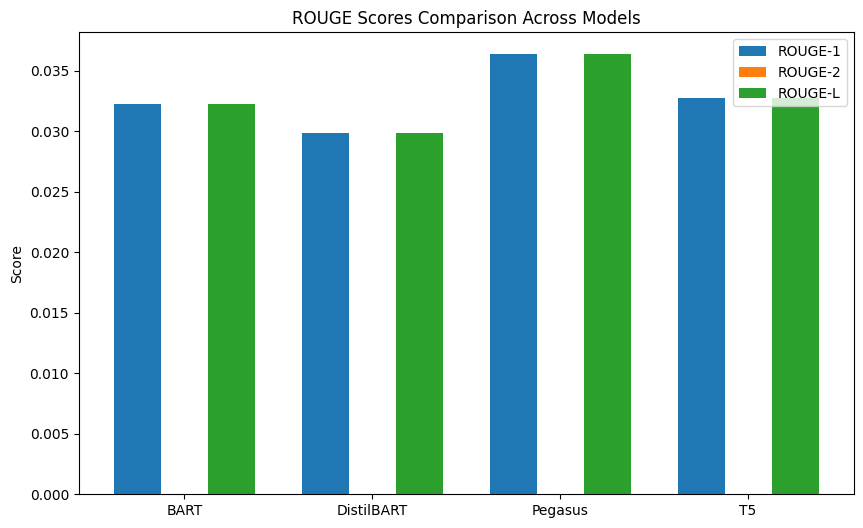

In [ ]:
# =========================
# Step 4: Visualize ROUGE Scores
# =========================

import matplotlib.pyplot as plt
import numpy as np

# Convert scores dictionary into a plottable format
models = list(scores.keys())   # ["BART", "DistilBART", "Pegasus", "T5"]

# Extract values for each metric
rouge1 = [float(scores[m]['rouge1']) for m in models]
rouge2 = [float(scores[m]['rouge2']) for m in models]
rougeL = [float(scores[m]['rougeL']) for m in models]

x = np.arange(len(models))  # positions for bars
width = 0.25  # width of each bar

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(x - width, rouge1, width, label='ROUGE-1')
plt.bar(x, rouge2, width, label='ROUGE-2')
plt.bar(x + width, rougeL, width, label='ROUGE-L')

# Add labels & legend
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("ROUGE Scores Comparison Across Models")
plt.legend()
plt.show()


Fine tuning the best performing model

In [ ]:
# ======================
# Step 5.1: Install dependencies
# ======================
!pip install datasets rouge_score transformers accelerate -q


In [ ]:
# ======================
# Step 5.2: Load dataset
# ======================
from datasets import load_dataset

# Load small subset to keep training light
dataset = load_dataset("cnn_dailymail", "3.0.0", split="train[:1%]")  # only 1% for demo
valid_dataset = load_dataset("cnn_dailymail", "3.0.0", split="validation[:1%]")

print(dataset[0])


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [ ]:
# ======================
# Step 5.3: Tokenization
# ======================
from transformers import PegasusTokenizer

model_name = "google/pegasus-cnn_dailymail"
tokenizer = PegasusTokenizer.from_pretrained(model_name)

def preprocess(example):
    inputs = tokenizer(
        example["article"], truncation=True, padding="max_length", max_length=1024
    )
    labels = tokenizer(
        example["highlights"], truncation=True, padding="max_length", max_length=128
    )
    inputs["labels"] = labels["input_ids"]
    return inputs

tokenized_train = dataset.map(preprocess, batched=True)
tokenized_valid = valid_dataset.map(preprocess, batched=True)


Map:   0%|          | 0/2871 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

In [ ]:
# =========================
# Step 1 (fixed): Multi-Model Summarizer with 4 models
# =========================

import gc
import torch

from transformers import (
    BartTokenizer, BartForConditionalGeneration,
    PegasusTokenizer, PegasusForConditionalGeneration,
    T5Tokenizer, T5ForConditionalGeneration,
)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

MODEL_KEYS = [
    "BART (facebook/bart-large-cnn)",
    "DistilBART (sshleifer/distilbart-cnn-12-6)",
    "Pegasus (google/pegasus-xsum)",
    "T5 (t5-base)"
]

MODEL_CONFIGS = {
    "BART (facebook/bart-large-cnn)": {
        "name": "facebook/bart-large-cnn",
        "tok_cls": BartTokenizer,
        "mdl_cls": BartForConditionalGeneration,
        "prefix": "",
        "max_input": 1024
    },
    "DistilBART (sshleifer/distilbart-cnn-12-6)": {
        "name": "sshleifer/distilbart-cnn-12-6",
        "tok_cls": BartTokenizer,
        "mdl_cls": BartForConditionalGeneration,
        "prefix": "",
        "max_input": 1024
    },
    "Pegasus (google/pegasus-xsum)": {
        "name": "google/pegasus-xsum",
        "tok_cls": PegasusTokenizer,
        "mdl_cls": PegasusForConditionalGeneration,
        "prefix": "",
        "max_input": 1024
    },
    "T5 (t5-base)": {
        "name": "t5-base",
        "tok_cls": T5Tokenizer,
        "mdl_cls": T5ForConditionalGeneration,
        "prefix": "summarize: ",  # T5 needs explicit instruction
        "max_input": 512
    }
}

_LOADED = {}

def get_model(model_key):
    if model_key in _LOADED:
        return _LOADED[model_key]
    cfg = MODEL_CONFIGS[model_key]
    tok = cfg["tok_cls"].from_pretrained(cfg["name"])
    mdl = cfg["mdl_cls"].from_pretrained(cfg["name"])
    mdl.to(DEVICE)
    mdl.eval()
    _LOADED[model_key] = (tok, mdl)
    return tok, mdl

@torch.inference_mode()
def summarize_with(model_key, text, max_length=150, min_length=30, num_beams=4, length_penalty=1.0):
    cfg = MODEL_CONFIGS[model_key]
    tok, mdl = get_model(model_key)
    prefixed = (cfg.get("prefix","") + text.strip())
    enc = tok([prefixed], max_length=cfg["max_input"], truncation=True, return_tensors="pt")
    enc = {k: v.to(DEVICE) for k, v in enc.items()}
    out_ids = mdl.generate(
        enc["input_ids"],
        max_length=int(max_length),
        min_length=int(min_length),
        num_beams=int(num_beams),
        length_penalty=float(length_penalty),
        early_stopping=True
    )
    return tok.decode(out_ids[0], skip_special_tokens=True)

def summarize_all(text, max_length=150, min_length=30, num_beams=4, length_penalty=1.0, memory_efficient=True):
    outputs = {}
    for key in MODEL_KEYS:
        outputs[key] = summarize_with(key, text, max_length, min_length, num_beams, length_penalty)
        if memory_efficient and key in _LOADED:
            del _LOADED[key]
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    return outputs


In [ ]:
# =========================
# Step 2 (fixed): Gradio UI with 4 models
# =========================

!pip install gradio evaluate --quiet

import gradio as gr
import evaluate

rouge = evaluate.load("rouge")

def compare_and_score(text, reference, max_length, min_length, num_beams, length_penalty):
    if not text or not text.strip():
        empty = [""] * len(MODEL_KEYS)
        return (*empty, {})
    outputs = summarize_all(
        text,
        max_length=max_length,
        min_length=min_length,
        num_beams=num_beams,
        length_penalty=length_penalty,
        memory_efficient=True
    )
    summaries_in_order = [outputs[k] for k in MODEL_KEYS]

    if reference and reference.strip():
        scores = {}
        for k in MODEL_KEYS:
            res = rouge.compute(predictions=[outputs[k]], references=[reference])
            scores[k] = {m: float(v) for m, v in res.items()}
    else:
        scores = {}
    return (*summaries_in_order, scores)

with gr.Blocks(title="Multi-Model Text Summarizer") as demo:
    gr.Markdown("## 📝 Compare 4 Summarization Models (BART, DistilBART, Pegasus, T5)")
    text_in = gr.Textbox(lines=10, label="Input Text", placeholder="Paste an article here...")

    with gr.Accordion("Advanced Settings", open=False):
        max_len = gr.Slider(40, 300, value=150, step=10, label="max_length")
        min_len = gr.Slider(10, 150, value=30, step=5, label="min_length")
        beams = gr.Slider(1, 8, value=4, step=1, label="num_beams")
        lpen = gr.Slider(0.1, 2.5, value=1.0, step=0.1, label="length_penalty")

    ref_in = gr.Textbox(lines=3, label="(Optional) Reference Summary for ROUGE")

    run_btn = gr.Button("Compare Models")

    out_bart       = gr.Textbox(label=MODEL_KEYS[0])
    out_distilbart = gr.Textbox(label=MODEL_KEYS[1])
    out_pegasus    = gr.Textbox(label=MODEL_KEYS[2])
    out_t5         = gr.Textbox(label=MODEL_KEYS[3])
    metrics_json   = gr.JSON(label="ROUGE Scores")

    run_btn.click(
        fn=compare_and_score,
        inputs=[text_in, ref_in, max_len, min_len, beams, lpen],
        outputs=[out_bart, out_distilbart, out_pegasus, out_t5, metrics_json]
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe99366d4c950fb9cb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# # ======================
# # Step 5.4: Fine-tune model (with W&B disabled)
# # ======================
# import os
# os.environ["WANDB_DISABLED"] = "true"

# from transformers import PegasusForConditionalGeneration, Trainer, TrainingArguments

# model = PegasusForConditionalGeneration.from_pretrained(model_name)

# training_args = TrainingArguments(
#     output_dir="./results",
#     eval_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=2,
#     per_device_eval_batch_size=2,
#     num_train_epochs=1,  # keep small for demo
#     weight_decay=0.01,
#     save_total_limit=1,
#     logging_dir="./logs",
#     logging_steps=10,
#     push_to_hub=False,
#     report_to="none"  # also disables other loggers
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_train,
#     eval_dataset=tokenized_valid,
# )

# trainer.train()


In [ ]:
# Write the requirements.txt file
with open("requirements.txt", "w") as f:
    f.write("transformers>=4.30.0\n")
    f.write("torch\n")
    f.write("gradio\n")
    f.write("evaluate\n")


In [ ]:
# readme_text = """
# ---
# title: Multi-Model Text Summarizer
# emoji: 📝
# colorFrom: blue
# colorTo: green
# sdk: gradio
# sdk_version: "3.42"
# app_file: app.py
# pinned: true
# ---


# # 📝 Multi-Model Text Summarizer


# This project compares **4 state-of-the-art summarization models** using Hugging Face Transformers and Gradio:

# - **BART (facebook/bart-large-cnn)**
# - **DistilBART (sshleifer/distilbart-cnn-12-6)**
# - **Pegasus (google/pegasus-xsum)**
# - **T5 (t5-base)**

# ## 🚀 Features
# - Input any long text (e.g., articles, reports).
# - Generate summaries from all 4 models.
# - Compare results side by side.
# - (Optional) Provide a reference summary and compute **ROUGE scores**.

# ## 🖥️ Tech Stack
# - Python
# - Hugging Face Transformers
# - PyTorch
# - Gradio (for UI)
# - Evaluate (for metrics)

# ## 📦 Setup
# To run locally:

#     pip install -r requirements.txt
#     python app.py

# ## 🌐 Deployment
# This app can run locally or be deployed on **Hugging Face Spaces**.
# """

# with open("README.md", "w") as f:
#     f.write(readme_text)


In [ ]:
readme_text = """
---
title: Multi-Model Text Summarizer
emoji: 📝
colorFrom: blue
colorTo: green
sdk: gradio
app_file: app.py
pinned: true
---

# 📝 Multi-Model Text Summarizer

This project compares **4 state-of-the-art summarization models** using Hugging Face Transformers and Gradio:

- **BART (facebook/bart-large-cnn)**
- **DistilBART (sshleifer/distilbart-cnn-12-6)**
- **Pegasus (google/pegasus-xsum)**
- **T5 (t5-base)**

## 🚀 Features
- Input any long text (e.g., articles, reports).
- Generate summaries from all 4 models.
- Compare results side by side.
- (Optional) Provide a reference summary and compute **ROUGE scores**.

## 🖥️ Tech Stack
- Python
- Hugging Face Transformers
- PyTorch
- Gradio (for UI)
- Evaluate (for metrics)

## 📦 Setup
To run locally:

    pip install -r requirements.txt
    python app.py

## 🌐 Deployment
This app can run locally or be deployed on **Hugging Face Spaces**.
"""

with open("README.md", "w") as f:
    f.write(readme_text)


In [ ]:
# ======================
# app.py - Main Gradio UI
# ======================

import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration, PegasusForConditionalGeneration, PegasusTokenizer, T5Tokenizer, T5ForConditionalGeneration
import torch

# ----------------------
# Load Models & Tokenizers
# ----------------------
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

distilbart_tokenizer = BartTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")
distilbart_model = BartForConditionalGeneration.from_pretrained("sshleifer/distilbart-cnn-12-6")

pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

# ----------------------
# Helper function for summarization
# ----------------------
def summarize(text, model, tokenizer, prefix=""):
    inputs = tokenizer(
        [prefix + text],
        max_length=1024,
        return_tensors="pt",
        truncation=True
    )
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=150,
        min_length=40,
        num_beams=4,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# ----------------------
# Gradio App
# ----------------------
def multi_model_summarizer(text):
    return {
        "BART": summarize(text, bart_model, bart_tokenizer),
        "DistilBART": summarize(text, distilbart_model, distilbart_tokenizer),
        "Pegasus": summarize(text, pegasus_model, pegasus_tokenizer),
        "T5": summarize(text, t5_model, t5_tokenizer, prefix="summarize: ")
    }

demo = gr.Interface(
    fn=multi_model_summarizer,
    inputs=gr.Textbox(lines=8, placeholder="Paste text here..."),
    outputs=[
        gr.Textbox(label="BART Summary"),
        gr.Textbox(label="DistilBART Summary"),
        gr.Textbox(label="Pegasus Summary"),
        gr.Textbox(label="T5 Summary")
    ],
    title="📝 Multi-Model Text Summarizer",
    description="Compare summaries from BART, DistilBART, Pegasus, and T5."
)

if __name__ == "__main__":
    demo.launch()


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [ ]:
app_code = """# ======================
# app.py - Main Gradio UI
# ======================

import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration, PegasusForConditionalGeneration, PegasusTokenizer, T5Tokenizer, T5ForConditionalGeneration
import torch

# ----------------------
# Load Models & Tokenizers
# ----------------------
bart_tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
bart_model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

distilbart_tokenizer = BartTokenizer.from_pretrained("sshleifer/distilbart-cnn-12-6")
distilbart_model = BartForConditionalGeneration.from_pretrained("sshleifer/distilbart-cnn-12-6")

pegasus_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

t5_tokenizer = T5Tokenizer.from_pretrained("t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-base")

# ----------------------
# Helper function for summarization
# ----------------------
def summarize(text, model, tokenizer, prefix=""):
    inputs = tokenizer(
        [prefix + text],
        max_length=1024,
        return_tensors="pt",
        truncation=True
    )
    summary_ids = model.generate(
        inputs["input_ids"],
        max_length=150,
        min_length=40,
        num_beams=4,
        early_stopping=True
    )
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# ----------------------
# Gradio App
# ----------------------
def multi_model_summarizer(text):
    return (
        summarize(text, bart_model, bart_tokenizer),
        summarize(text, distilbart_model, distilbart_tokenizer),
        summarize(text, pegasus_model, pegasus_tokenizer),
        summarize(text, t5_model, t5_tokenizer, prefix="summarize: ")
    )

demo = gr.Interface(
    fn=multi_model_summarizer,
    inputs=gr.Textbox(lines=8, placeholder="Paste text here..."),
    outputs=[
        gr.Textbox(label="BART Summary"),
        gr.Textbox(label="DistilBART Summary"),
        gr.Textbox(label="Pegasus Summary"),
        gr.Textbox(label="T5 Summary")
    ],
    title="📝 Multi-Model Text Summarizer",
    description="Compare summaries from BART, DistilBART, Pegasus, and T5."
)

if __name__ == "__main__":
    demo.launch()
"""

# write to file
with open("app.py", "w") as f:
    f.write(app_code)


In [ ]:
!pip install huggingface_hub --quiet
from huggingface_hub import login

# This will ask you for your Hugging Face token
login()


In [ ]:
!git clone https://huggingface.co/spaces/priankaM/multi-model-text-summarizer


Cloning into 'multi-model-text-summarizer'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.33 KiB | 1.33 MiB/s, done.


In [ ]:
!cp /content/app.py /content/multi-model-text-summarizer/
!cp /content/requirements.txt /content/multi-model-text-summarizer/
!cp /content/README.md /content/multi-model-text-summarizer/


In [ ]:
%cd /content/multi-model-text-summarizer/
!git add .
!git commit -m "Initial commit of multi-model summarizer"
!git push


/content/multi-model-text-summarizer
[main 34712e1] Initial commit of multi-model summarizer
 3 files changed, 102 insertions(+), 14 deletions(-)
 rewrite README.md (99%)
 create mode 100644 app.py
 create mode 100644 requirements.txt
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (5/5), 1.66 KiB | 1.66 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
remote: -------------------------------------------------------------------------
remote: Your push was accepted, but with warnings: 
remote: - Warning: empty or missing yaml metadata in repo card
remote: help: https://huggingface.co/docs/hub/spaces-config-reference
remote: -------------------------------------------------------------------------
remote: -------------------------------------------------------------------------
remote: Please find the documentation at:
remote: https://huggingface.co/docs/

In [ ]:
!git config --global user.email "your_email@example.com"
!git config --global user.name "Y"


In [ ]:
!git add README.md
!git commit -m "Fix Space metadata YAML"
!git push


[main faf8f6f] Fix Space metadata YAML
 1 file changed, 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 294 bytes | 294.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/spaces/priankaM/multi-model-text-summarizer
   2cb2cd5..faf8f6f  main -> main


In [ ]:
%cd /content/multi-model-text-summarizer


/content/multi-model-text-summarizer


In [ ]:
!git init


Reinitialized existing Git repository in /content/multi-model-text-summarizer/.git/


In [ ]:
!git config --global user.email "your-email@example.com"
!git config --global user.name "your-username"


In [ ]:
!git remote add origin https://huggingface.co/spaces/priankaM/multi-model-text-summarizer


error: remote origin already exists.


In [ ]:
!git add .
!git commit -m "Initial commit: multi-model summarizer placeholders"


[main 9c5c8cf] Initial commit: multi-model summarizer placeholders
 1 file changed, 1 deletion(-)


In [ ]:
!git push origin main


Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 317 bytes | 317.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/spaces/priankaM/multi-model-text-summarizer
   868380d..9c5c8cf  main -> main


In [ ]:
# Save app.py
app_code = """
import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration, PegasusForConditionalGeneration, T5ForConditionalGeneration, T5Tokenizer

# Load models and tokenizers here (we won't run them locally, just define)
# ...

def summarize_text(text):
    # Dummy function for Space; actual inference happens in the Space
    return "Summary placeholder"

iface = gr.Interface(
    fn=summarize_text,
    inputs=gr.Textbox(lines=10, placeholder="Paste text here..."),
    outputs=[gr.Textbox(label="BART Summary"),
             gr.Textbox(label="DistilBART Summary"),
             gr.Textbox(label="Pegasus Summary"),
             gr.Textbox(label="T5 Summary")],
    title="Multi-Model Text Summarizer",
    description="Compare summaries from 4 models"
)

if __name__ == "__main__":
    iface.launch()
"""

with open("app.py", "w") as f:
    f.write(app_code)


# Save README.md with correct YAML front matter
readme_text = """---
title: Multi-Model Text Summarizer
emoji: 📝
colorFrom: blue
colorTo: green
sdk: gradio
app_file: app.py
pinned: true
---

# Multi-Model Text Summarizer
Compare 4 state-of-the-art summarization models in Hugging Face Spaces.
"""

with open("README.md", "w") as f:
    f.write(readme_text)

# Save requirements.txt
requirements = """gradio
transformers
torch
"""
with open("requirements.txt", "w") as f:
    f.write(requirements)
